# Report summary

In [1]:
# Import statements
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime as dt
import sys

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Select daily files
from datetime import date, timedelta
prev_day = date.today() - timedelta(1)
d1 = prev_day.strftime("../arbitor_fund_staging/log/tradeOpportunity%Y-%m-%d.json")

In [4]:
# Load data from json files
try:
    data = []
    file_exist = False
    #with open('./arbitor_data/tradeOpportunity2019-12-08.json') as f:
    with open(d1) as f:
        for line in f:
            data.append(json.loads(line))
        file_exist = True
except FileNotFoundError:
    try:
        print('File not found error occured', d1)
        sys.exit()
    except SystemExit:
        print('System exited')
except:
    try:
        print('An unkown error occured')
        sys.exit()
    except SystemExit:
        print('System exited')

In [5]:
# Create pandas df from json
if file_exist:
    df = pd.DataFrame.from_dict(data, orient='columns')
    formattedData = []
    for item in data:
        b = {'route':'-'.join(item['route']), 'price':item['price'][-1], 'mktsize':item['mktSize'][-1], 'timestamp':item['timestamp'][0]}
        formattedData.append(b.copy())
    cleandf = pd.DataFrame.from_dict(formattedData, orient='columns')

## Sorted summary table of opportunities

In [6]:
# Group df by price, market size and duration, sort routes by duration and mean price
if file_exist:
    groupeddf = cleandf.groupby('route', as_index=True).agg(
        min_price=pd.NamedAgg(column='price',aggfunc=min),
        mean_price=pd.NamedAgg(column='price',aggfunc=np.mean),
        max_price=pd.NamedAgg(column='price',aggfunc=max),
        min_mktsize=pd.NamedAgg(column='mktsize',aggfunc=min),
        mean_mktsize=pd.NamedAgg(column='mktsize',aggfunc=np.mean),
        max_mktsize=pd.NamedAgg(column='mktsize',aggfunc=max),
        duration=pd.NamedAgg(column='timestamp',aggfunc=np.size),
    )
    print(d1);
    sortedg = groupeddf.sort_values(by=['duration','mean_price'], ascending=[False, False])
    display(sortedg.head(10))

../arbitor_fund_staging/log/tradeOpportunity2020-05-20.json


,min_price,mean_price,max_price,min_mktsize,mean_mktsize,max_mktsize,duration
route,,,,,,,
BTCGBP-kraken-GBPBTC-coinfloor,1.001048,1.002469,1.005627,0.000298,0.579794,3.714859,28
GBPBTC-coinfloor-BTCGBP-kraken,1.001048,1.002469,1.005627,2.329200,4475.883793,28938.750000,28
GBPBTC-coinfloor-BTCEUR-kraken-EURGBP-kraken,1.001293,1.004455,1.006070,337.700000,2856.599208,3892.131928,14
BTCEUR-kraken-EURGBP-kraken-GBPBTC-coinfloor,1.001293,1.004455,1.006070,0.044000,0.371658,0.504358,14
EURGBP-kraken-GBPBTC-coinfloor-BTCEUR-kraken,1.001293,1.004455,1.006070,376.813211,3229.267113,4387.916000,14
BTCGBP-coinbase-GBPBTC-coinfloor,1.001071,1.001780,1.002693,0.030050,1.358165,2.971558,11
GBPBTC-coinfloor-BTCGBP-coinbase,1.001071,1.001780,1.002693,230.423400,10440.587014,22881.000000,11
BTCEUR-kraken-EURBTC-coinbase,1.001005,1.001325,1.001819,0.020663,0.216403,0.422727,6
EURBTC-coinbase-BTCEUR-kraken,1.001005,1.001325,1.001819,179.442051,1880.252263,3671.802422,6


## Visualisation for each route

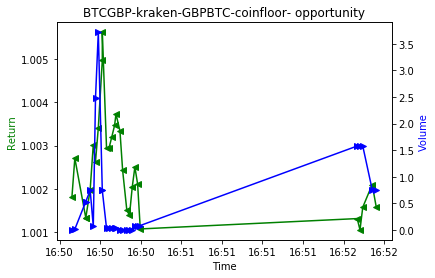

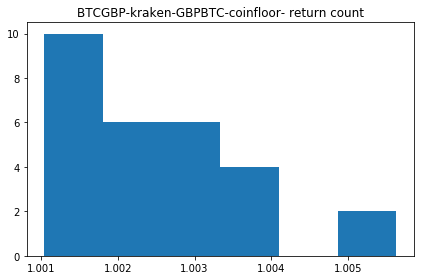

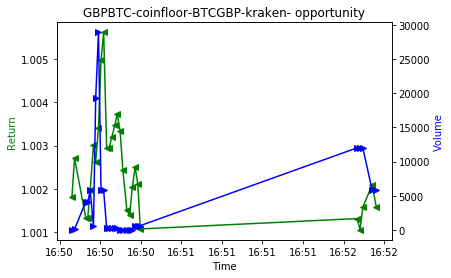

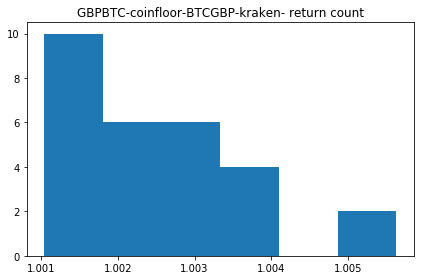

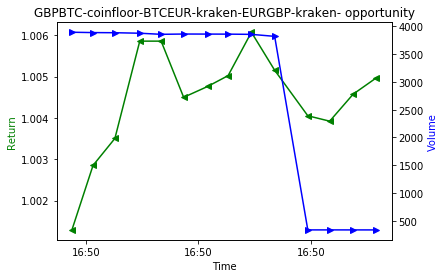

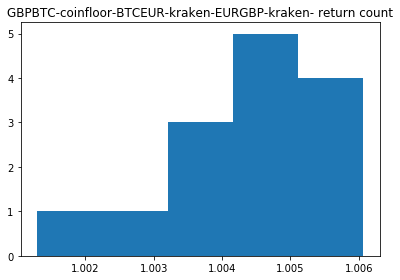

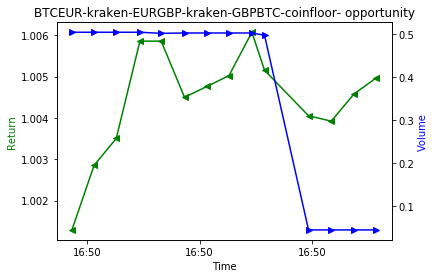

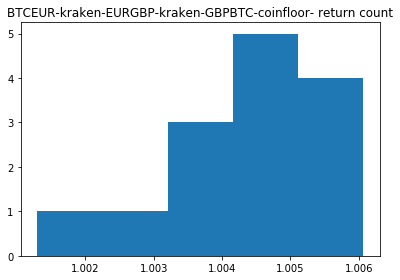

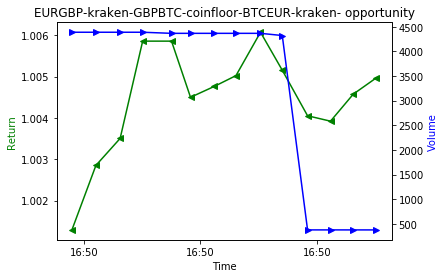

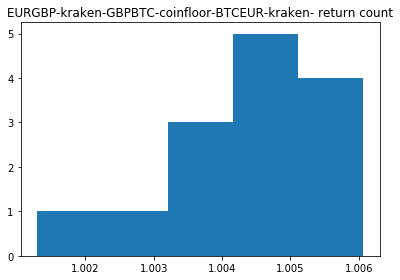

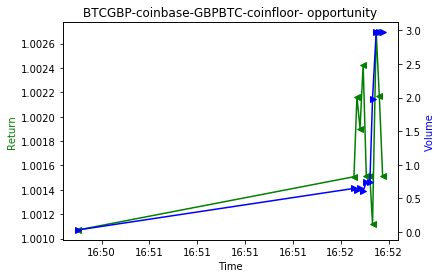

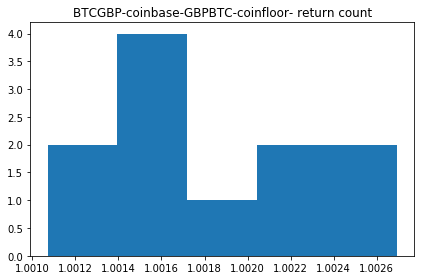

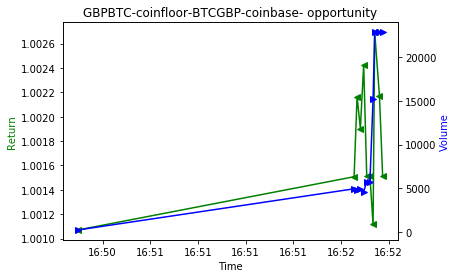

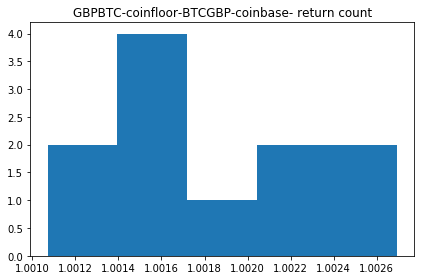

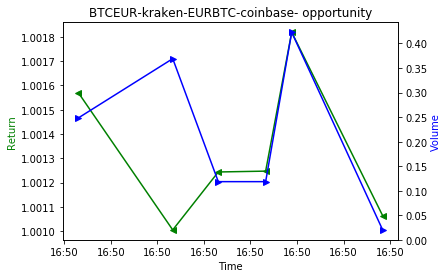

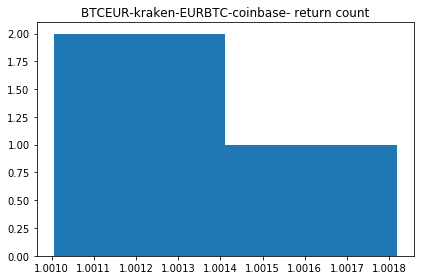

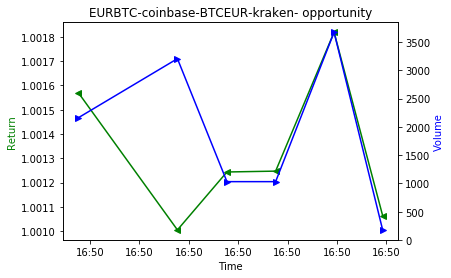

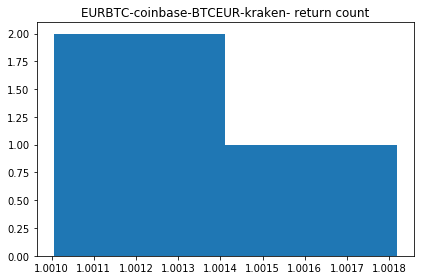

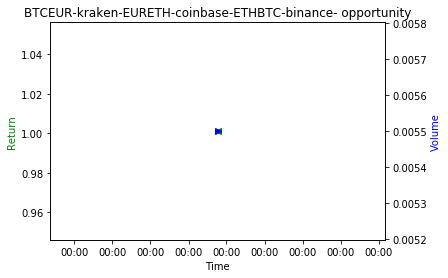

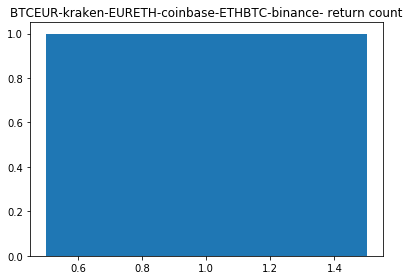

In [7]:
# Generate visualisation for each route
if file_exist:
    imax = np.minimum(10, sortedg.shape[0])
    for i in range(imax):
        plotdata = cleandf[cleandf.route == sortedg.index[i]].copy()
        # format price data
        plotdata.loc[:,'price2'] = ((plotdata.price.copy()-1)*100).map('{:,.2}'.format)
        # format timestamp
        dateconv = np.vectorize(dt.datetime.fromtimestamp)
        date = dateconv(plotdata.timestamp.values/1000)

        # visualisation
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(date, plotdata.price, '<g-')
        ax2.plot(date, plotdata.mktsize, '>b-')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Return', color='g')
        ax2.set_ylabel('Volume', color='b')

        myFmt = md.DateFormatter('%H:%M')
        ax1.xaxis.set_major_formatter(myFmt)
        plt.title(sortedg.index[i]+ '- opportunity')
        plt.show()

        x = plotdata.price.values
        plt.hist(x, bins='auto')
        plt.title(sortedg.index[i]+ '- return count')
        plt.tight_layout()
        plt.show()